<a href="https://colab.research.google.com/github/DSGP-Group-1-EAPS/SL-Apparel-Dataset/blob/Ranidu-Gurusinghe/EAPS_Data_Describing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib  import pyplot as plt
from google.colab import drive

In [4]:
# Mount Google Drive
drive.mount('/content/drive')

# Read the CSV file
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/SL Apparel Industry Dataset.xlsx')
df.head()


Mounted at /content/drive


,Date,Shift,Code,Department,Absenteeism Type,Status,Reason Mapping,Leave Type,Absent/Present,Reason
0,2021-12-01,Shift A,AA369,Team - MAT 4A - BD,Informed,Notified,NaN,1.0,MAT,Maternity
1,2021-12-01,Shift A,AA362,Team - MAT 4A - BD,Informed,Notified,NaN,1.0,MAT,Maternity
2,2021-12-01,Shift A,AA359,Team - MAT 4A - BD,Informed,Notified,NaN,1.0,MAT,Maternity
3,2021-12-01,Shift A,AA541,Team - MAT 4A - BD,Informed,Notified,NaN,1.0,MAT,Maternity
4,2021-12-01,Shift A,AA398,Team - MAT 3A - BD,Informed,Notified,NaN,1.0,MAT,Maternity


In [5]:
df.tail()

,Date,Shift,Code,Department,Absenteeism Type,Status,Reason Mapping,Leave Type,Absent/Present,Reason
110532,2023-12-22,Shift A,AA3659,Sewing Team - 140A - I - BD,Informed,Notified,NaN,1.0,Absent,Medical Leave
110533,2023-12-22,Shift A,AA3719,Sewing Team - 106A - I - BD,Uninformed,Not Notified,NaN,1.0,Absent,VOP
110534,2023-12-22,Shift A,AA3845,Team - MAT 1A - BD,Informed,Notified,NaN,1.0,Absent,Maternity
110535,2023-12-22,Shift A,AA3984,Team - MAT 4A - BD,Informed,Notified,NaN,1.0,Absent,Maternity
110536,2023-12-22,Shift A,AA4098,Team - MAT 4A - BD,Informed,Notified,NaN,1.0,Absent,Maternity


In [6]:
df.shape

(110537, 10)

In [7]:
df.columns

Index(['Date', 'Shift', 'Code', 'Department', 'Absenteeism Type', 'Status',
       'Reason Mapping', 'Leave Type', 'Absent/Present', 'Reason'],
      dtype='object')

In [8]:
df.isna().sum()

Date                     0
Shift                    0
Code                     0
Department              10
Absenteeism Type       826
Status                 832
Reason Mapping      110537
Leave Type              79
Absent/Present          27
Reason                   0
dtype: int64

In [9]:
df.duplicated(keep="first").sum()

2016

##Exploratory Data Analysis

In [10]:
df.describe(include='all')

<ipython-input-10-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Date,Shift,Code,Department,Absenteeism Type,Status,Reason Mapping,Leave Type,Absent/Present,Reason
count,110537,110537,110537,110527,109711,109705,0.0,110458.000000,110510,110537
unique,572,7,3796,304,4,3,NaN,NaN,3,26
top,2021-12-26 00:00:00,Shift B,AA663,Team - MAT 1B - BD,Informed,Notified,NaN,NaN,Absent,Personal Reason
freq,1244,56658,260,2730,78881,85601,NaN,NaN,101388,30116
first,2021-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-12-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.986384,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.082622,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


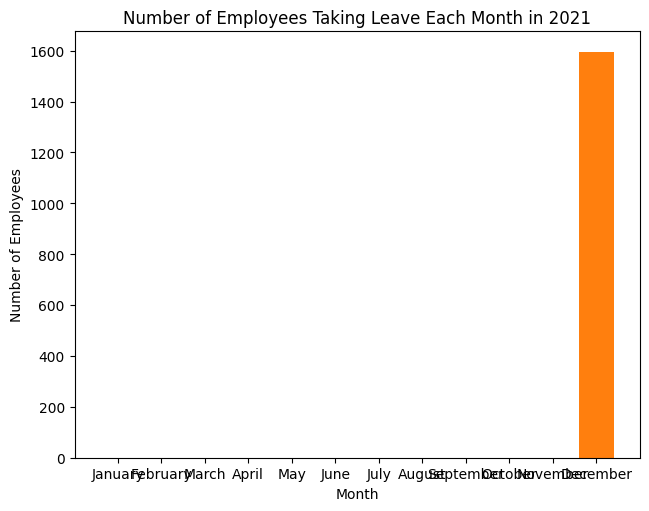

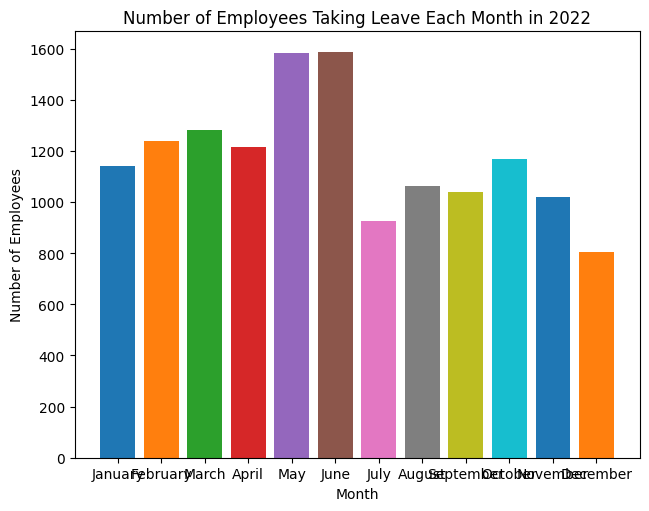

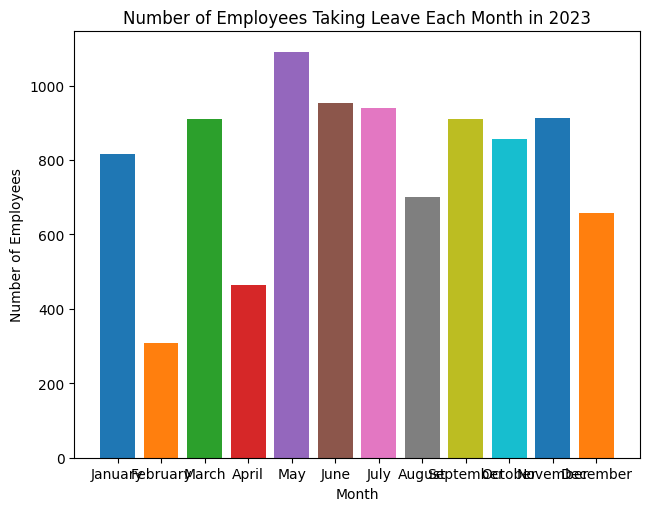

In [11]:
import matplotlib.pyplot as plt

import calendar

# Assuming 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
year = 2021
for j in range(0, 3):
  year = 2021
  year = year+j
  for i in range(1, 13):

      monthly_2022_data = df[(df['Date'].dt.year == year) & (df['Date'].dt.month == i)]

      # Get unique employee codes
      employee_codes_monthly_2022 = monthly_2022_data['Code'].unique()

      # Plotting
      plt.bar(calendar.month_name[i], employee_codes_monthly_2022.size)
  plt.tight_layout()
  # Adding labels and title
  plt.xlabel('Month')
  plt.ylabel('Number of Employees')
  plt.title(f'Number of Employees Taking Leave Each Month in {year}')
  # Show the plot
  plt.show()



In [15]:
# Replace 'employee_code' with the actual code you want to query
employee_code_to_query = 'AA2283'

# Filter the DataFrame for the specified employee code
employee_leave_data = df[df['Code'] == employee_code_to_query]

# Display the dates and reasons for leave
leave_info = employee_leave_data[['Date', 'Reason']]
print(leave_info)


             Date                           Reason
4031   2021-12-17                         Funeral 
6565   2021-12-26                         Funeral 
10856  2022-01-13                         Funeral 
11141  2022-01-14                         Funeral 
13677  2022-01-26                         Funeral 
16066  2022-02-03                         Funeral 
19241  2022-02-14                         Funeral 
27324  2022-03-23                         Funeral 
42724  2022-05-28                         Funeral 
47379  2022-06-15                         Funeral 
52244  2022-07-12                         Funeral 
56281  2022-08-15                         Funeral 
64123  2022-10-14                         Funeral 
68079  2022-11-03                  Personal Reason
68530  2022-11-05                  Personal Reason
87758  2023-03-17                  Personal Reason
94314  2023-06-16                       No Message
94505  2023-06-19  Family Member - Health Related 
103141 2023-09-21              

In [30]:
# Assuming 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Get unique months in the entire dataset
unique_months = df['Date'].dt.to_period("M").unique()

# Loop through each unique month
for month_period in unique_months:
    # Filter for the specific month
    monthly_data = df[df['Date'].dt.to_period("M") == month_period]

    # Extract unique dates in the month
    unique_dates = monthly_data['Date'].dt.date.unique()

    # Count the number of weekdays (Monday to Saturday) in the month
    working_days_count = np.isin(pd.to_datetime(unique_dates).weekday, [0, 1, 2, 3, 4, 5]).sum()

    # Calculate total shifts and absenteeism rate
    total_shifts_for_month = working_days_count * 3796 * 2
    leaves_count_month = len(monthly_data)
    absenteeism_rate = (leaves_count_month / total_shifts_for_month) * 100

    # Print the result
    print(f"Absenteeism rate for {month_period}: {absenteeism_rate:.2f}%")


Absenteeism rate for 2021-12: 4.28%
Absenteeism rate for 2022-01: 3.62%
Absenteeism rate for 2022-02: 4.52%
Absenteeism rate for 2022-03: 3.66%
Absenteeism rate for 2022-04: 3.90%
Absenteeism rate for 2022-05: 4.63%
Absenteeism rate for 2022-06: 3.79%
Absenteeism rate for 2022-07: 2.00%
Absenteeism rate for 2022-08: 2.33%
Absenteeism rate for 2022-09: 2.54%
Absenteeism rate for 2022-10: 2.85%
Absenteeism rate for 2022-11: 2.93%
Absenteeism rate for 2022-12: 3.11%
Absenteeism rate for 2023-01: 2.94%
Absenteeism rate for 2023-02: 0.94%
Absenteeism rate for 2023-03: 1.98%
Absenteeism rate for 2023-04: 0.68%
Absenteeism rate for 2023-05: 1.84%
Absenteeism rate for 2023-06: 1.54%
Absenteeism rate for 2023-07: 1.36%
Absenteeism rate for 2023-09: 1.37%
Absenteeism rate for 2023-08: 1.38%
Absenteeism rate for 2023-10: 1.51%
Absenteeism rate for 2023-11: 1.55%
Absenteeism rate for 2023-12: 1.51%
